# Lab02: Frequent itemset mining

- Student ID: 21127129 
- Student name: Lê Nguyễn Kiều Oanh  

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**

- Frequent itemset mining.

# 1. Preliminaries
## This is how it all started ...
- Rakesh Agrawal, Tomasz Imielinski, Arun N. Swami: Mining Association Rules between Sets of Items in Large Databases. SIGMOD Conference 1993: 207-216
- Rakesh Agrawal, Ramakrishnan Srikant: Fast Algorithms for Mining Association Rules in Large Databases. VLDB 1994: 487-499

**These two papers are credited with the birth of Data Mining**
## Frequent itemset mining (FIM)

Find combinations of items (itemsets) that occur frequently.
## Applications
- Items = products, transactions = sets of products someone bought in one trip to the store.
$\Rightarrow$ items people frequently buy together.
    + Example: if people usually buy bread and coffee together, we run a sale of bread to attract people attention and raise price of coffee.
- Items = webpages, transactions = words. Unusual words appearing together in a large number of documents, e.g., “Brad” and “Angelina,” may indicate an interesting relationship.
- Transactions = Sentences, Items = Documents containing those sentences. Items that appear together too often could represent plagiarism.

## Transactional Database
A transactional database $D$ consists of $N$ transactions: $D=\left\{T_1,T_2,...,T_N\right\}$. A transaction $T_n \in D (1 \le n \le N)$ contains one or more items and that $I= \left\{ i_1,i_2,…,i_M \right\}$ is the set of distinct items in $D$, $T_n \subset I$. Commonly, a transactional database is represented by a flat file instead of a database system: items are non-negative integers, each row represents a transaction, items in a transaction separated by space.

Example: 

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

30 31 32 

33 34 35 

36 37 38 39 40 41 42 43 44 45 46 

38 39 47 48 

38 39 48 49 50 51 52 53 54 55 56 57 58 

32 41 59 60 61 62 

3 39 48 

63 64 65 66 67 68 



# Definition

- Itemset: A collection of one or more items.
    + Example: {1 4 5}
- **k-itemset**: An itemset that contains k items.
- Support: Frequency of occurrence of an itemset.
    + Example: From the example above, item 3 appear in 2 transactions so its support is 2.
- Frequent itemset: An itemset whose support is greater than or equal to a `minsup` threshold

# The Apriori Principle
- If an itemset is frequent, then all of its subsets must also be frequent.
- If an itemset is not frequent, then all of its supersets cannot be frequent.
- The support of an itemset never exceeds the support of its subsets.
$$ \forall{X,Y}: (X \subseteq Y) \Rightarrow s(X)\ge s(Y)$$


# 2. Implementation


## The Apriori algorithm
Suppose:

$C_k$ candidate itemsets of size k.

$L_k$ frequent itemsets of size k.

The level-wise approach of Apriori algorithm can be descibed as follow:
1. k=1, $C_k$ = all items.
2. While $C_k$ not empty:
    3. Scan the database to find which itemsets in $C_k$ are frequent and put them into $L_k$.
    4. Use $L_k$ to generate a collection of candidate itemsets $C_{k+1}$ of size k+1.
    5. k=k+1.

### Import library

In [1]:
from collections import defaultdict

### Read data
First we have to read data from database

In [2]:

def readData(path):
    """
    Parameters
    --------------------------
        path: path of database D.
         
    --------------------------
    Returns
        data: a dictionary for representing database D
                 - keys: transaction tids
                 - values: itemsets.
        s: support of distict items in D.
    """
    data={}
    s=defaultdict(lambda: 0) # Initialize a dictionary for storing support of items in I.  
    with open(path,'rt') as f:
        tid=1;
        for line in f:
            itemset=set(map(int,line.split())) # a python set is a native way for storing an itemset.
            for item in itemset:  
                s[item]+=1     #Why don't we compute support of items while reading data?
            data[tid]= itemset
            tid+=1
    
    return data, s

### Tree Projection

**I gave you pseudo code of Apriori algorithm above but we implement Tree Projection. Tell me the differences of two algorithms.**


**TODO:**

The Tree Projection (TP) algorithm and the Apriori algorithm are both fundamental methods used for frequent itemset mining in association rule learning. While they share the same goal of discovering frequent itemsets, they differ in their approach and implementation. Here's a comparison of the two algorithms:

|         | APRIORI ALGORITHM   | TREE PROJECTION ALGORITHM  |
|-----------------|-------------------------------------------------------------------------------------------------------------|-------|
| **Data Structure**  | Uses a candidate generation-and-test approach, where it maintains a list of candidate itemsets at each iteration. These candidate itemsets are generated based on the frequent itemsets found in the previous iteration.  | Uses a tree-like data structure to represent the search space. This structure organizes itemsets hierarchically, allowing for efficient traversal and pruning. |
| **Candidate Generation** | Generates candidate itemsets by joining frequent itemsets found in the previous iteration. This involves generating all possible combinations of itemsets and pruning those that do not meet minimum support.| Generates candidate itemsets by extending existing itemsets using a join operation. It explores the search space in a depth-first manner, projecting itemsets onto a tree structure.|
| **Pruning Mechanism** | Prunes candidate itemsets by using the downward closure property, which states that if an itemset is infrequent, all of its supersets are also infrequent. This property allows Apriori to avoid generating and testing certain candidate itemsets. | Prunes itemsets based on minimum support directly within the tree structure. It marks or removes infrequent itemsets from the tree, avoiding further exploration of their subsets.|
| **Efficiency**      | Apriori can suffer from scalability issues, especially when dealing with large datasets or when the minimum support threshold is low. This is because it generates a large number of candidate itemsets at each iteration. | The TP algorithm is often more efficient than Apriori, particularly when implemented using appropriate data structures like trees. By organizing itemsets hierarchically and efficiently pruning the search space, TP can reduce the computational overhead associated with candidate generation. |
| **Memory Usage**    |  Apriori may require substantial memory to store candidate itemsets and support counts, especially for large datasets. |The TP algorithm tends to be more memory-efficient, particularly when implemented using compact data structures like trees. It only stores itemsets and support counts that are necessary for the current iteration, leading to reduced memory overhead.|

In [3]:
def joinset(a, b):
    '''
    Parameters
    -------------------
        2 itemsets a and b (of course they are at same branch in search space)

    -------------------
    return
        ret: itemset generated by joining a and b
    '''
    # TODO (hint: this function will be called in generateSearchSpace method.):
    ret = set(a).union(b)
    return ret

class TP:
    def __init__(self, data=None, s=None, minSup=None):
        self.data = data
        self.s = {}

        for key, support in sorted(s.items(), key=lambda item: item[1]):
            self.s[key] = support
        # TODO: why should we do this, answer it at the markdown below?

        self.minSup = minSup
        self.L = {}  # Store frequent itemsets mined from database
        self.runAlgorithm()

    def initialize(self):
        """
        Initialize search space at first step
        --------------------------------------
        We represent our search space in a tree structure
        """
        tree = {}

        search_space = {}
        for item, support in self.s.items():
            search_space[item] = {}

            search_space[item]['itemset'] = [item]
            ''' 
            python set does not remain elements order
            so we use a list to extend it easily when create new itemset 
            but why we store itemset in data by a python set???? '''
            # TODO: study about python set and its advantages,
            # answer at the markdown below.

            search_space[item]['pruned'] = False
            # TODO:
            # After finish implementing the algorithm tell me why should you use this
            # instead of delete item directly from search_space and tree.

            search_space[item]['support'] = support

            tree[item] = {}
            '''
            Why should i store an additional tree (here it called tree)? 
            Answer: This really help in next steps.

            Remember that there is always a big gap from theory to practicality
            and implementing this algorithm in python is not as simple as you think.
            '''

        return tree, search_space

    def computeItemsetSupport(self, itemset):

        '''Return support of itemset'''
        # TODO (hint: this is why i use python set in data)

        support = 0
        for i in self.data.keys():
            if itemset.issubset(self.data[i]):
                support += 1
       
        return support

    def get_sub_tree(self, k, tree, search_space, itter_node):
        if k == 0:
            return search_space[itter_node]['support']
        subtree = search_space[itter_node]
        for node in subtree.keys():
            k-=1
            self.get_sub_tree(k,tree,search_space,node)


    def prune(self, k, tree, search_space):

        '''
        In this method we will find out which itemset in current search space is frequent
        itemset then add it to L[k]. In addition, we prune those are not frequent itemsets.
        '''
        if self.L.get(k) is None: self.L[k] = []
        # TODO
    
        for item in search_space.keys():
            if item in tree:
                if search_space[item]['support'] < self.minSup:
                    search_space[item]['pruned'] = True
                    tree.pop(item)
                else:
                    self.L[k].append(search_space[item]['itemset'])

    def generateSearchSpace(self, k, tree, search_space):
        '''
        Generate search space for exploring k+1 itemset. (Recursive function)
        '''
        items = list(tree.keys())
        ''' print search_space.keys() you will understand  
         why we need an additional tree, '''
        
        l = len(items)
        self.prune(k, tree, search_space)
        if l == 0: return  # Stop condition
        for i in range(l - 1):
            sub_search_space = {}
            sub_tree = {}
            a = items[i]
            if search_space[a]['pruned']: continue

            for j in range(i + 1, l):
                b = items[j]
                search_space[a][b] = {}
                tree[a][b] = {}
                # You really need to understand what am i doing here before doing work below.
                # (Hint: draw tree and search space to draft).

                # TODO:
                # First create newset using join set
                newset = joinset(search_space[a]['itemset'], search_space[b]['itemset'])
                
                # Second add newset to search_space
                search_space[a][b] = {'itemset': newset, 'pruned': False, 'support': self.computeItemsetSupport(newset)}
                sub_tree = tree[a]
                sub_search_space = search_space[a]
            
            #  Generate search_space for k+1-itemset
            self.generateSearchSpace(k + 1, sub_tree, sub_search_space)

    def runAlgorithm(self):
        tree, search_space = self.initialize()  # generate search space for 1-itemset
        self.generateSearchSpace(1, tree, search_space)

    def miningResults(self):
        return self.L

Ok, let's test on a typical dataset `chess`.

In [4]:
data, s= readData('chess.txt')

In [5]:
#
a=TP(data=data,s=s, minSup=3000)
print(a.miningResults())

{1: [[48], [56], [66], [34], [62], [7], [36], [60], [40], [29], [52], [58]], 2: [{48, 52}, {48, 58}, {56, 29}, {56, 52}, {56, 58}, {66, 60}, {66, 29}, {66, 52}, {66, 58}, {40, 34}, {34, 29}, {34, 52}, {34, 58}, {60, 62}, {40, 62}, {29, 62}, {52, 62}, {58, 62}, {60, 7}, {40, 7}, {29, 7}, {52, 7}, {58, 7}, {36, 60}, {40, 36}, {36, 29}, {36, 52}, {58, 36}, {40, 60}, {60, 29}, {60, 52}, {58, 60}, {40, 29}, {40, 52}, {40, 58}, {52, 29}, {58, 29}, {58, 52}], 3: [{48, 58, 52}, {56, 52, 29}, {56, 58, 29}, {56, 58, 52}, {66, 60, 29}, {66, 60, 52}, {66, 60, 58}, {66, 52, 29}, {66, 58, 29}, {66, 52, 58}, {40, 34, 29}, {40, 34, 52}, {40, 34, 58}, {34, 52, 29}, {34, 58, 29}, {34, 52, 58}, {60, 29, 62}, {60, 62, 52}, {58, 60, 62}, {40, 29, 62}, {40, 52, 62}, {40, 58, 62}, {52, 29, 62}, {58, 29, 62}, {58, 52, 62}, {40, 60, 7}, {60, 29, 7}, {60, 52, 7}, {58, 60, 7}, {40, 29, 7}, {40, 52, 7}, {40, 58, 7}, {52, 29, 7}, {58, 29, 7}, {58, 52, 7}, {40, 36, 60}, {36, 29, 60}, {36, 60, 52}, {58, 36, 60}, {40

### Answer questions here:
**Why don't we compute support of items while reading data?**

- It's because computing support while reading the data can be more efficient, especially for large datasets. By computing support during the reading process, we avoid the need to traverse the dataset multiple times, which would be necessary if we first read all the data and then computed support separately. This approach saves memory and processing time, making the algorithm more efficient overall.

**why should we do sort**

Sorting the dictionary `self.s` in the `__init__` method by support values is essential for optimizing the performance of the TP algorithm. Here's a detailed explanation of why sorting is necessary:

1. **Efficient Pruning:** The TP algorithm prunes infrequent itemsets to reduce the search space. To prune efficiently, it's crucial to process itemsets in order of increasing support. Sorting `self.s` ensures that we start with itemsets having lower support values, making it more likely to encounter infrequent itemsets early in the process. This allows for quicker pruning, reducing the computational overhead.

2. **Improved Performance:** Processing itemsets with lower support values first can lead to faster termination of the algorithm. As we progress through the sorted list of itemsets, we may encounter a point where no more frequent itemsets can be generated. Sorting `s` helps in reaching this termination point sooner, thereby improving the overall performance of the algorithm.

3. **Algorithmic Efficiency:** The Apriori algorithm relies on the downward closure property, which states that any subset of an infrequent itemset must also be infrequent. Sorting `self.s` allows us to exploit this property more effectively by ensuring that itemsets with lower support are processed first. This facilitates early detection of infrequent itemsets and subsequent pruning, contributing to algorithmic efficiency.

In summary, sorting the dictionary `self.s` by support values is a crucial step in the initialization of the TP algorithm. It enables efficient pruning, improves algorithmic performance, and leverages the downward closure property to optimize the mining process for frequent itemsets.

**study about python set and its advantages ?**

A set is a collection of unique elements, it’s a mathematical concept that has been implemented in many programming languages. In computer science, a set data structure is a data structure that stores a collection of unique elements and provides efficient operations for adding, removing, and querying for the presence of elements.

Set data structures are commonly used in a variety of computer science applications, including algorithms, data analysis, and databases. The main advantage of using a set data structure is that it allows you to perform operations on a collection of elements in an efficient and organized way.

- `Advantages of Set`:
  + Set can be used to store unique values in order to avoid duplications of elements present in the set.
  + Elements in a set are stored in a sorted fashion which makes it efficient.
  + Set are dynamic, so there is no error of overflowing of the set.
  + Searching operation takes O(logN) time complexity.
  + Sets provide fast and efficient operations for checking if an element is present in the set or not.
  + Sets can be implemented using different data structures, such as HashSets and TreeSets, each with its own advantages and use cases.
  + Sets can be used in a variety of applications, including algorithms, data analysis, and databases.
  + Sets can be used to improve performance in many algorithms by providing fast lookups.
 
- `Advantages of Set using in TP_Class `:
  + Uniqueness: Sets automatically eliminate duplicate elements, which is crucial for dealing with itemsets where duplicate items are irrelevant.
  + Efficient Membership Testing: Sets offer constant-time average complexity for membership testing (x in s). This property is useful for checking whether an itemset is a subset of a transaction, contributing to faster support computation.
  + Set Operations: Sets support various set operations like union, intersection, difference, etc., which are helpful in set manipulation tasks such as joining itemsets (joinset function in this code).


**After finish implementing the algorithm tell me why should you use this? Instead of delete item directly from search_space and tree.**

Using the `pruned` flag allows the algorithm to mark infrequent itemsets without actually removing them from `search_space` and `tree`. This approach is beneficial because:

+ *Maintaining Structure*: By keeping all nodes intact, it's easier to maintain the structure of the search space and the tree. This structure might be crucial for backtracking or other traversal operations within the algorithm.
+ *Efficiency*: Deleting items from data structures can be computationally expensive, especially if done frequently within loops. Marking items as pruned is a lightweight operation compared to deletion.
+ *Debugging and Analysis*: Marking items as pruned preserves information about the search process, which can be valuable for debugging and analyzing the algorithm's behavior.

**Apriori algorithm and Tree Projection, tell me the differences of two algorithms.**

- `Apriori Algorithm`:
  + Generates candidate itemsets by joining frequent itemsets of size k-1 to find frequent itemsets of size k.
  + Prunes infrequent itemsets by applying the downward closure property, which states that any subset of an infrequent itemset must also be infrequent.
  + Employs a level-wise approach, where frequent itemsets of size k are used to generate candidate itemsets of size k+1, and the process continues until no more frequent itemsets can be found.
  + Uses support counting to determine the frequency of itemsets in the dataset.


- `Tree Projection`:
  + Utilizes a prefix tree (FP-tree) to represent the dataset compactly.
  + Constructs the FP-tree in a single scan of the dataset, avoiding the need for generating candidate itemsets explicitly.
  + Mines frequent itemsets by recursively projecting conditional FP-trees from each frequent item, reducing the search space.
  + Prunes infrequent itemsets dynamically during tree construction and projection based on support thresholds.
  + Generally more memory efficient than the Apriori algorithm, especially for large datasets, due to its compact data structure.


# 3. Churn analysis

In this section, you will use frequent itemset mining technique to analyze `churn` dataset (for any purposes). 

*Remember this dataset is not represented as a transactional database, first thing that you have to do is transforming it into a flat file.  

### Create dataframe to save data from **`churn.txt`**

In [6]:
# TODO
# YOUR CODE HERE
import pandas as pd
import numpy as np
df = pd.read_csv('churn.txt', delimiter=',')
pd.set_option('display.max_columns', None)

### Exploring and understanding dataset

+ Data has a total of **21 columns** collected from **3333 users** of a company about whether users leave and stop using the company's services.

In [7]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


+ **Meaning of Columns**


| Column name      | Description                                           |
|---------------|-------------------------------------------------|
| `State`        | Các bang và Quận liên bang Columbia             |
| `Account Length`| Thời gian mà tài khoản đã hoạt động            |
| `Area Code`     | Mã vùng điện thoại                              |
| `Phone`         | Số điện thoại của khách hàng (được xem như là ID của khách hàng)                   |
| `Int'l Plan`    | Khách hàng có kế hoạch sử dụng dịch vụ quốc tế |
| `VMail Plan `   | Khách hàng có kế hoạch sử dụng dịch vụ thư thoại (VoiceMail) |
| `VMail Message` | Số lượng tin nhắn thoại mà khách hàng đã nhận được |
| `Day Mins`| Tổng số phút mà khách hàng đã sử dụng dịch vụ trong ban ngày |
| `Day Calls     `| Tổng số cuộc  mà khách hàng đã sử dụng dịch vụ trong ban ngày |
| `Day Charge    `| Tổng cước phí mà khách hàng phải trả cho việc sử dụng dịch vụ trong ban ngày |
| `Eve Mins      `| Tổng số phút mà khách hàng đã sử dụng dịch vụ trong buổi chiều |
| `Eve Calls   `  | Tổng số cuộc gọi mà khách hàng đã sử dụng dịch vụ trong buổi chiều |
| `Eve Charge   ` | Tổng cước phí mà khách hàng phải trả cho việc sử dụng dịch vụ trong buổi chiều |
| `Night Mins    `| Tổng số phút mà khách hàng đã sử dụng dịch vụ trong buổi tối |
| `Night Calls  ` | Tổng số cuộc gọi mà khách hàng đã sử dụng dịch vụ trong buổi tối |
| `Night Charge  `| Tổng cước phí mà khách hàng phải trả cho việc sử dụng dịch vụ trong buổi tối |
| `Intl Mins     `| Tổng số phút mà khách hàng đã sử dụng dịch vụ để thực hiện cuộc gọi quốc tế |
| `Intl Calls    `| Tổng số cuộc gọi mà khách hàng đã sử dụng dịch vụ để thực hiện cuộc gọi quốc tế |
| `Intl Charge   `| Tổng cước phí mà khách hàng phải trả cho việc sử dụng dịch vụ để thực hiện cuộc gọi quốc tế |
| `CustServ Calls`| Số lần mà khách hàng đã gọi vào dịch vụ khách hàng để yêu cầu hỗ trợ hoặc giải quyết các vấn đề liên quan đến dịch vụ của họ |
| `Churn?        `| Khách hàng có rời khỏi hay không                |


+ Next, let's look at the data distribution of numeric columns to better understand the data

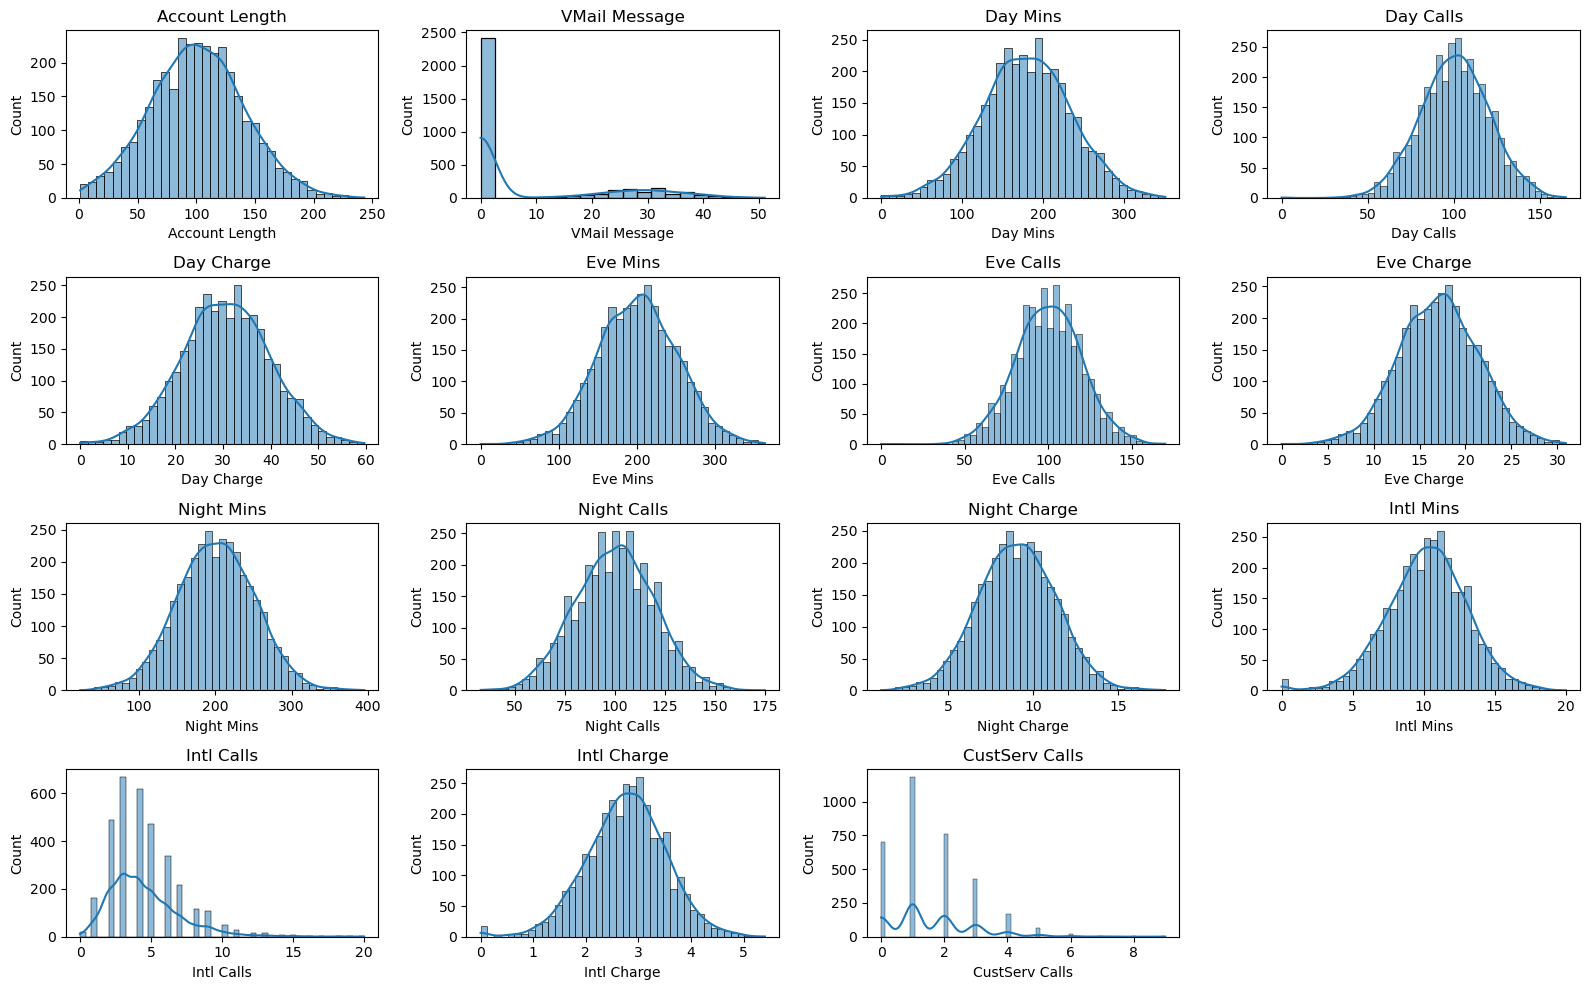

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ['Account Length','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge',
        'Night Mins','Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

**Function `transform_dataframe2txt`**

+ This is the function to convert Dataframe to txt file with the appropriate format of `column name _ column value` and especially for column names with spaces, change the spaces to `_`
   + For example: `Area Code` has the value `415`, after going through the function it will turn into `Area_Code_415`
+ Input:
     + `path`: txt file name after conversion, format is **`txt`**
     + `df`: data set

**Function `readData_string`**
+ Similar to the `readData` function above, but this function can read variables whose data type is string. In particular, the values in the input `txt` file must be separated by spaces
+ Input:
   + `path`: name of the txt file you want to read
 
**Function `apply_TreeProjection`**:
+ This is a function that processes data and applies the data set using the Tree Projection algorithm
+ Input:
   + `df`: data set that wants to apply Tree Projection
   + `fileName`: name of the txt file you want to save after processing the data
   + `minSup`: Support threshold you want to apply

In [9]:
def transform_dataframe2txt(path, df):
    with open(path, 'w') as file:
        for row in range(len(df)):
            for col_name in df.columns:
                file.write(f"{col_name.replace(' ','_')}_{df[col_name][row]} ")
            file.write('\n')  

In [10]:
def readData_string(path):
    data = {}
    s = defaultdict(lambda: 0) # Initialize a dictionary for storing support of items in I.  

    with open(path, 'rt') as f:
        tid = 1
        for line in f:
            itemset = line.strip().split()  # Split the line into strings
            itemset = set(itemset)  # Convert the list of strings into a set of strings
            for item in itemset:
                s[item] += 1  # Increment support count for each item
            data[tid] = itemset
            tid += 1
    
    return data, s

In [11]:
def apply_TreeProjection( df, fileName, minSup):
    transform_dataframe2txt(fileName, df)
    data, s= readData_string(fileName)
    a=TP(data=data,s=s, minSup=minSup)
    print(*a.miningResults().items(),sep="\n")

### Using frequent itemset mining technique (`Tree Projection`) to analyze `churn` dataset

+ Apply the Tree Projection algorithm to the data set with `minSup = 500`

In [12]:
apply_TreeProjection(df, 'churn_processed.txt', 500)

(1, [['Intl_Calls_4'], ['Intl_Calls_3'], ['CustServ_Calls_0'], ['CustServ_Calls_2'], ['Area_Code_408'], ['Area_Code_510'], ['VMail_Plan_yes'], ['CustServ_Calls_1'], ['Area_Code_415'], ['VMail_Plan_no'], ['VMail_Message_0'], ['Churn?_False.'], ["Int'l_Plan_no"]])
(2, [{'Intl_Calls_4', 'Churn?_False.'}, {'Intl_Calls_4', "Int'l_Plan_no"}, {'Intl_Calls_3', 'Churn?_False.'}, {'Intl_Calls_3', "Int'l_Plan_no"}, {'VMail_Plan_no', 'CustServ_Calls_0'}, {'VMail_Message_0', 'CustServ_Calls_0'}, {'Churn?_False.', 'CustServ_Calls_0'}, {"Int'l_Plan_no", 'CustServ_Calls_0'}, {'CustServ_Calls_2', 'VMail_Plan_no'}, {'CustServ_Calls_2', 'VMail_Message_0'}, {'CustServ_Calls_2', 'Churn?_False.'}, {'CustServ_Calls_2', "Int'l_Plan_no"}, {'VMail_Plan_no', 'Area_Code_408'}, {'VMail_Message_0', 'Area_Code_408'}, {'Churn?_False.', 'Area_Code_408'}, {"Int'l_Plan_no", 'Area_Code_408'}, {'Area_Code_510', 'VMail_Plan_no'}, {'Area_Code_510', 'VMail_Message_0'}, {'Area_Code_510', 'Churn?_False.'}, {"Int'l_Plan_no", 'A

+ Next, we will find out what signs customers intend to leave the company's services (`churn = True`) often have.
+ To do so, we will take the data lines with `churn = True` and use the frequent itemset mining technique, specifically Tree Projection to find itemsets with frequency of appearing along with the leaving conclusion of The customer is the highest

In [13]:
new_df = df[df['Churn?'] == 'True.']
new_df.reset_index(inplace=True)

apply_TreeProjection(new_df, 'churn_processed_2.txt', 100)

(1, [['Intl_Calls_2'], ['Area_Code_408'], ['CustServ_Calls_1'], ['Area_Code_510'], ["Int'l_Plan_yes"], ['Area_Code_415'], ["Int'l_Plan_no"], ['VMail_Plan_no'], ['VMail_Message_0'], ['Churn?_True.']])
(2, [{'Churn?_True.', 'Intl_Calls_2'}, {'VMail_Plan_no', 'Area_Code_408'}, {'VMail_Message_0', 'Area_Code_408'}, {'Churn?_True.', 'Area_Code_408'}, {'VMail_Plan_no', 'CustServ_Calls_1'}, {'VMail_Message_0', 'CustServ_Calls_1'}, {'Churn?_True.', 'CustServ_Calls_1'}, {'Area_Code_510', 'VMail_Plan_no'}, {'Area_Code_510', 'VMail_Message_0'}, {'Churn?_True.', 'Area_Code_510'}, {'VMail_Plan_no', "Int'l_Plan_yes"}, {'VMail_Message_0', "Int'l_Plan_yes"}, {'Churn?_True.', "Int'l_Plan_yes"}, {"Int'l_Plan_no", 'Area_Code_415'}, {'Area_Code_415', 'VMail_Plan_no'}, {'Area_Code_415', 'VMail_Message_0'}, {'Churn?_True.', 'Area_Code_415'}, {"Int'l_Plan_no", 'VMail_Plan_no'}, {"Int'l_Plan_no", 'VMail_Message_0'}, {"Int'l_Plan_no", 'Churn?_True.'}, {'VMail_Plan_no', 'VMail_Message_0'}, {'Churn?_True.', 'VMa

It can be seen that the variables appearing in the frequent itemsets are almost all finite patched count variables. Variables about the total number of calls, charges or minutes are all float number and continuous variable, so the frequency of occurrence will usually be low and will not be included in frequent sets. Therefore, we will proceed with processinusing discretization by dividing real numbers by a fixed level for each variable. If any number is larger than the level, it will be changed to a categorical variable. This processing can be useful if we wanted to see the association of real variables with leaving the company.

After observing, the following columns have real numeric values that need to be processed (num_cols):
+ `Account Length`
+ `VMail Message`
+ `Day Mins`
+ `Day Calls`
+ `Day Charge`
+ `Eve Mins`
+ `Eve Calls`
+ `Eve Charge`
+ `Night Mins`
+ `Night Calls`
+ `Night Charge`
+ `Intl Mins`
+ `Intl Calls`
+ `Intl Charge`
+ `CustServ Calls`

We will analyze based on the extracted data set the rows with `churn = True` to see the distribution of numeric columns with high or low values that appear with high customer churn.

I choose the average value of the column as the decision level. For values greater than the average, it will be changed to `higher` and vice versa to `lower`

In [14]:
df_cp = new_df.copy()

for col in num_cols:
    mean_val = df_cp[col].mean()  
    df_cp[col] = pd.cut(df_cp[col], bins=[-float('inf'), mean_val, float('inf')], labels=['lower', 'higher'])
df_cp.head()

,index,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,10,IN,lower,415,329-6603,no,no,lower,lower,higher,lower,higher,lower,higher,higher,higher,higher,higher,higher,higher,higher,True.
1,15,NY,higher,415,351-7269,no,no,lower,higher,lower,higher,higher,lower,higher,lower,higher,lower,lower,higher,lower,higher,True.
2,21,CO,lower,408,393-7984,no,no,lower,lower,lower,lower,lower,higher,lower,higher,lower,higher,lower,higher,lower,higher,True.
3,33,AZ,lower,408,360-1596,no,no,lower,higher,higher,higher,higher,higher,higher,higher,lower,higher,higher,lower,higher,lower,True.
4,41,MD,higher,408,383-6029,yes,yes,higher,lower,lower,lower,lower,higher,lower,lower,lower,lower,higher,higher,higher,lower,True.


In [15]:
apply_TreeProjection(df_cp, 'churn_processed_3.txt', 300)

(1, [['CustServ_Calls_lower'], ['Intl_Calls_lower'], ["Int'l_Plan_no"], ['VMail_Message_lower'], ['VMail_Plan_no'], ['Churn?_True.']])
(2, [{'Churn?_True.', 'CustServ_Calls_lower'}, {'Churn?_True.', 'Intl_Calls_lower'}, {"Int'l_Plan_no", 'VMail_Message_lower'}, {"Int'l_Plan_no", 'VMail_Plan_no'}, {"Int'l_Plan_no", 'Churn?_True.'}, {'VMail_Message_lower', 'VMail_Plan_no'}, {'Churn?_True.', 'VMail_Message_lower'}, {'Churn?_True.', 'VMail_Plan_no'}])
(3, [{"Int'l_Plan_no", 'VMail_Message_lower', 'VMail_Plan_no'}, {"Int'l_Plan_no", 'Churn?_True.', 'VMail_Message_lower'}, {"Int'l_Plan_no", 'Churn?_True.', 'VMail_Plan_no'}, {'Churn?_True.', 'VMail_Message_lower', 'VMail_Plan_no'}])
(4, [{"Int'l_Plan_no", 'Churn?_True.', 'VMail_Message_lower', 'VMail_Plan_no'}])
